# Optimization

## Remake of tuto_optim02.py & tuto_optim02b.py 

## Part I - I0 is a simulated image

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import math
from skimage import draw
from scipy import signal
from PIL import Image

First, we create a function to generate light sources

In [2]:
def sources_s(dist,sx,sy):
    output=np.zeros((sy,sx), dtype=float) #Generates a sy by sx null matrix
    output[math.floor(sy/2),math.ceil((sx-1)/2-dist)]=1  #Sets to 1 a position at distance -dist respect to the center
    output[math.floor(sy/2),math.floor((sx-1)/2+dist)]=1 #Sets to 1 a position at distance +dist respect to the center
    return output

We import the PSF (h(t))

In [3]:
h = Image.open('images/h_0001.jpg')
realsize=h.size
factor=4
newsize=tuple(int(ti/factor) for ti in realsize)
h=h.resize(newsize,Image.ANTIALIAS)
h = np.array(h,dtype=float)
h = h[:, :, 0] #For instance, at point (100,50) we had [0.608, 0.608, 0.608]. Now only have a single 0.608 value.
size_x = len(h[0])
size_y = len(h)
print(h.shape) #[Y,X]
print('h(t) imported and reduced correctly!')
print(size_x)
print(size_y)
[size_y,size_x]=h.shape
print(size_x)
print(size_y)

(616, 820)
h(t) imported and reduced correctly!
820
616
820
616


We create i0(t) as x0(t)*h(t)

In [4]:
d0=10
x_0=sources_s(d0,size_x,size_y)  #We generate the possible input
i_0=signal.fftconvolve(x_0, h,mode='same') #We filter it with h(t)
[i_size_y,i_size_x]=i_0.shape # We collect the shape to aviod problems with the subtraction of matrices
print('i0(t) generated correctly!')

i0(t) generated correctly!


We generate the arrays containg (d,norm)

In [5]:
d_array=np.array([],dtype=float) #To make a plot, we initialize this np.array for the x-axis
norm_array=np.array([],dtype=float) #To make a plot, we initialize this np.array for the y-axis

range_d=math.floor(len(h[0])/2)
print(range_d) #We print the range to know, in advance, the number of iterations

for d in range(5,16): #To make things easier, range only form 5 to 16
    x_s=sources_s(d,i_size_x,i_size_y)  #We generate the possible input
    i_s=signal.fftconvolve(x_s, h,mode='same') #We filter it with h(t)
    norma = np.linalg.norm(i_0-i_s) #We obtain the NORM
    d_array=np.insert(d_array,len(d_array),d) #X-array
    norm_array=np.insert(norm_array,len(norm_array),norma) #Y-array

410


Now we have the results in two arrays. We can plot them.

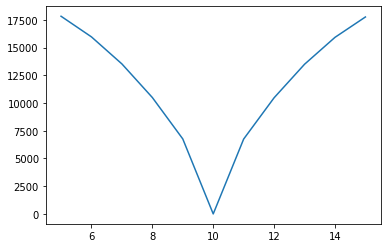

In [6]:
plt.plot(d_array,norm_array)
plt.show()

We can find the minimum

In [11]:
norm_minim=np.amin(norm_array)
min_pos,=np.where(norm_array==norm_minim)
d_minim=float(d_array[min_pos])

print('minimum norm:',norm_minim)
print('minimmum distance:',d_minim)

minimum norm: 0.0
minimmum distance: 10.0
